In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Couette Flow problem**

The equation to be solved here is, 
$$\frac{{d^2}u}{dy^2} = -P$$
with corresponding boundary conditions,

$u = 0$ for $y = 0$, $u = 1$ for $y = 1$

## **Analytical Solution**

$$\frac{{d^2}u}{dy^2} = -P$$
$$\frac{du}{dy} = -Py+c_1$$
$$u = \frac{-Py^2}{2}+c_1y+c_2$$
Solving using the boundary conditions we get,
$$c_1 = 1+\frac{P}{2} ,c_2=0$$
Therefore the final solution is given by,
$$u = \frac{-Py^2}{2}+\left(1+\frac{P}{2}\right)y$$

In [2]:
def analytical_solution(y, P):
    u = -(P*(y**2) / 2) + (1 + P/2)*y
    return u

In [3]:
y = np.arange(0, 1.01, 0.01)
P = np.array([-2, 0, 2, 5, 10])

analytical_u = {}

for i in range(len(P)):
    analytical_u[i] = analytical_solution(y, P[i])

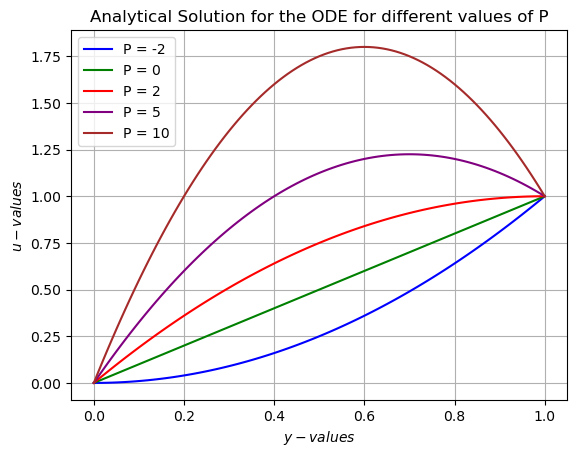

In [4]:
color = ["blue", "green", "red", "purple", "brown"]

for i in range(len(P)):
    plt.plot(y, analytical_u[i], c=color[i], label=f"P = {P[i]}", linewidth=1.5)
plt.xlabel("$y-values$")
plt.ylabel("$u-values$")
plt.title("Analytical Solution for the ODE for different values of P")
plt.grid()
plt.legend()
plt.show()

## **Solving BVP using Finite difference**

The formula to be used to solve this BVP is
$$y_i^{'} = \frac{y_{i+1} - y_{i-1}}{2\Delta x}$$
$$ y_i^{''} = \frac{y_{i+1} - 2y_i + y_{i-1}}{(\Delta x)^2} $$

If we apply this formula to the above ODE with the change of variable we get,
$$\frac{u_{i+1}- 2u_i + u_{i-1} }{(\Delta y)^2} = -P$$
Where, $\Delta y$ is the step size

Let $\Delta y = 0.01$, Then we have 101 values of $y$ from 0 to 1 which gives 101 equations,
$$u_0 = 0$$
$$\frac{u_2-2u_1+u_0}{(0.01)^2} = -P$$
$$\frac{u_3-2u_2+u_1}{(0.01)^2} = -P$$
$$\vdots$$
$$\frac{u_{99}-2u_{98}+u_{97}}{(0.01)^2} = -P$$
$$\frac{u_{100}-2u_{99}+u_{98}}{(0.01)^2} = -P$$
$$u_{100}= 1$$

Now if we write above equations in matrix form we have,
$$\begin{bmatrix}
1 & 0 & 0 &  \ldots & 0 & 0 \\
1 & -2 & 1 &  \ldots & 0 & 0 \\
0 & 1 & -2 &  \ldots & 0 & 0 \\
\vdots &  \vdots & \vdots & \vdots & \vdots  & \vdots \\
0 & 0 & 0 &  \ldots & -2 & 1 \\
0 & 0 & 0 & \ldots & 0 & 1 \\
\end{bmatrix} 
\begin{bmatrix}
u_0\\
u_1 \\
u_2\\
\vdots\\
u_{99}\\
u_{100}\\
\end{bmatrix}  = 
\begin{bmatrix}
0\\
-(0.01)^2P \\
-(0.01)^2P \\
\vdots\\
-(0.01)^2P \\
1\\
\end{bmatrix} $$

We then use thomas algorithm to solve this matrix equation.

In [5]:
def thomas(a,b,c,d):
    """ A is the tridiagnonal coefficient matrix and d is the RHS matrix"""
    N = len(a)
    cp = np.zeros(N,dtype='float64') # store tranformed c or c'
    dp = np.zeros(N,dtype='float64') # store transformed d or d'
    X = np.zeros(N,dtype='float64') # store unknown coefficients
    
    # Perform Forward Sweep
    # Equation 1 indexed as 0 in python
    cp[0] = c[0]/b[0]  
    dp[0] = d[0]/b[0]
    # Equation 2, ..., N (indexed 1 - N-1 in Python)
    for i in np.arange(1,(N),1):
        dnum = b[i] - a[i]*cp[i-1]
        cp[i] = c[i]/dnum
        dp[i] = (d[i]-a[i]*dp[i-1])/dnum
    
    # Perform Back Substitution
    X[(N-1)] = dp[N-1]  # Obtain last xn 

    for i in np.arange((N-2),-1,-1):  # use x[i+1] to obtain x[i]
        X[i] = (dp[i]) - (cp[i])*(X[i+1])
    
    return(X)

In [6]:
def bvp_solution(delta_y, P, boundary_cond):

    y = y = np.arange(0, 1 + delta_y, delta_y)
    n = len(y)
    u_0, u_n = boundary_cond

    a = np.full(n, 1) # 1st lower diagonal
    a[0] = 0
    a[-1] = 0

    b = np.full(n, -2) # Diagonal elements
    b[0] = 1
    b[-1] = 1

    c = np.full(n, 1) # 1st upper diagonal
    c[0] = 0
    c[-1] = 0

    d = np.full(n, -P * delta_y**2) # RHS vector
    d[0] = u_0  # Boundary condition
    d[-1] = u_n # Boundary condition

    u = thomas(a, b, c, d)

    return y, u

In [7]:
del_y = 0.01
y_bvp = []
u_bvp = []

for i in range(len(P)):
    y, u = bvp_solution(del_y, P[i], (0, 1))
    y_bvp.append(y)
    u_bvp.append(u)

y_bvp = np.array(y_bvp)
u_bvp = np.array(u_bvp)

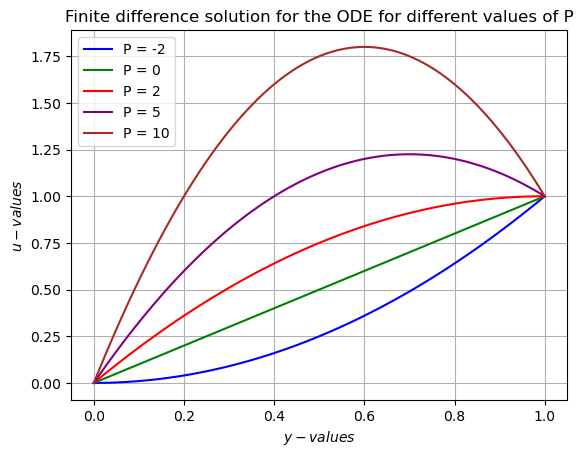

In [8]:
for i in range(len(P)):
    plt.plot(y_bvp[i], u_bvp[i], c=color[i], label=f"P = {P[i]}")
plt.xlabel("$y-values$")
plt.ylabel("$u-values$")
plt.title("Finite difference solution for the ODE for different values of P")
plt.grid()
plt.legend()
plt.show()

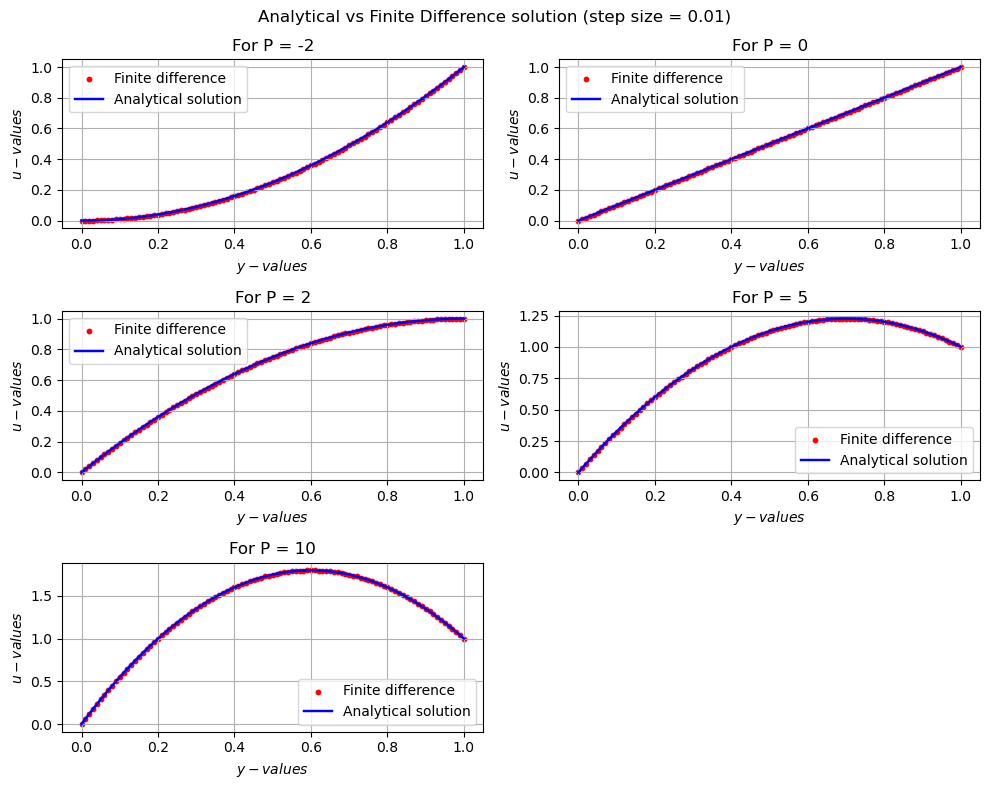

In [9]:
plt.figure(figsize=(10,8))

for i in range(len(P)):
    plt.subplot(3,2,i+1)
    plt.scatter(y_bvp[i], u_bvp[i], c="red", s=10, label = "Finite difference")
    plt.plot(y, analytical_u[i], c="blue", label="Analytical solution", linewidth=1.75)
    plt.xlabel("$y-values$")
    plt.ylabel("$u-values$")
    plt.title(f"For P = {P[i]}")
    plt.grid()
    plt.legend()

plt.suptitle(f"Analytical vs Finite Difference solution (step size = {del_y})")
plt.tight_layout()
plt.show()

## **Solving IVP**

First we convert the BVP problem into IVP.

Let us take, $$u_1 = \frac{du}{dy}$$
Then we get, $$\frac{du_1}{dy} = \frac{d^2u}{dy^2} = -P$$
$$ \frac{du_1}{dy} = -P$$
The boundary conditions are, 
$u(0) = 0$  and  $u(1) = 1$

Then we have two equations,
$$u^{'} = u_1 $$
$$u_1^{'} = -P$$

The initial condition is $u(0) = 0$ and the initial condition for $u_1$ is given in such a way that it satisfies the boundary condition of $u$.

Let us say,  $u_1(0) = u^{'}(0) = s$,  such that $u(1) = 1$. To find $s$, we use shooting method.

### **Explicit Euler**

The formula of Explicit Euler is, 
$$y_{n+1} = y_n + hy_n^{'}$$
where, $h$ is the step size .

If we apply this to above two ODEs, we get,
$$u_{n+1} = u_n + hu_n^{'}$$
$$u_{1,n+1} = u_{1,n} + hu_{1,n}^{'}$$
Then we substituite the $u_n^{'}$ and $u_{1,n}^{'}$  from ODEs we get, 
$$u_{n+1} = u_n + hu_{1,n}$$
$$u_{1,n+1} = u_{1,n} - hP$$

In [10]:
def explicit_euler(y, P, initial):
    n = len(y)
    h = y[1] - y[0]
    u = np.zeros(n)
    u1 = np.zeros(n)
    u_0, u1_0 = initial
    u[0] = u_0
    u1[0] = u1_0

    for i in range(n-1):
        u[i+1] = u[i] + h * u1[i]
        u1[i+1] = u1[i] - h * P

    return u, u1

In [11]:
def shoot_using_explicit(y, P):

    tol = 1e-6
    max_iters = 100
    low = -100
    high = 100
    count = 0

    while count <= max_iters:
        count = count + 1
        u_0 = 0
        u_n = 1
        u1_0 = np.mean([low, high])

        u, u1 = explicit_euler(y, P, (u_0, u1_0))
        
        if np.abs(u_n - u[-1]) <= tol:
            break

        if u_n - u[-1] < 0:
            high = u1_0
        else:
            low = u1_0

    return u1_0

In [22]:
h = 0.5
y_ivp = np.arange(0, 1 + h, h)
u1_0_explicit = []

for i in range(len(P)):
    x = shoot_using_explicit(y_ivp, P[i])
    u1_0_explicit.append(x)

u1_0_explicit = np.array(u1_0_explicit)

print("The initial condition for u1 for different values of P using explicit Euler:")
for i in range(len(P)):
    print(f"For P = {P[i]} : u1(0) = {u1_0_explicit[i]}")

The initial condition for u1 for different values of P using explicit Euler:
For P = -2 : u1(0) = 0.4999995231628418
For P = 0 : u1(0) = 0.9999990463256836
For P = 2 : u1(0) = 1.5000000596046448
For P = 5 : u1(0) = 2.250000834465027
For P = 10 : u1(0) = 3.4999996423721313


In [23]:
u_explicit = []
u1_explicit = []

for i in range(len(P)):
    u, u1 = explicit_euler(y_ivp, P[i], (0, u1_0_explicit[i]))
    u_explicit.append(u)
    u1_explicit.append(u1)

u_explicit = np.array(u_explicit)
u1_explicit = np.array(u1_explicit)

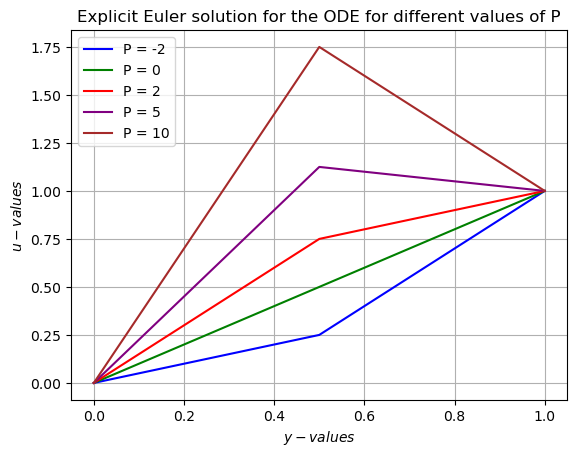

In [24]:
for i in range(len(P)):
    plt.plot(y_ivp, u_explicit[i], c=color[i], label=f"P = {P[i]}", linewidth=1.5)
plt.xlabel("$y-values$")
plt.ylabel("$u-values$")
plt.title("Explicit Euler solution for the ODE for different values of P")
plt.grid()
plt.legend()
plt.show()

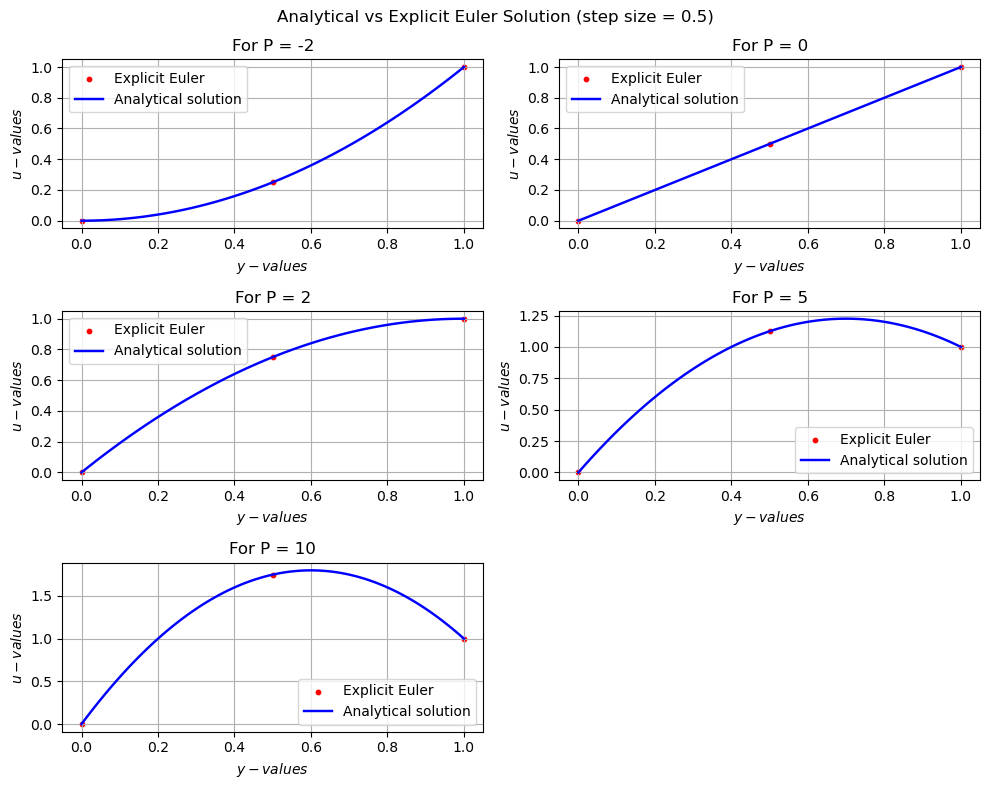

In [25]:
plt.figure(figsize=(10,8))

for i in range(len(P)):
    plt.subplot(3,2,i+1)
    plt.scatter(y_ivp, u_explicit[i], c="red", s=10, label = "Explicit Euler")
    plt.plot(y, analytical_u[i], c="blue", label="Analytical solution", linewidth=1.75)
    plt.xlabel("$y-values$")
    plt.ylabel("$u-values$")
    plt.title(f"For P = {P[i]}")
    plt.grid()
    plt.legend()

plt.suptitle(f"Analytical vs Explicit Euler Solution (step size = {h})")
plt.tight_layout()
plt.show()

### **Implicit Euler**

The formula of Implicit Euler is, 
$$y_{n+1} = y_n + hy_{n+1}^{'}$$
where, $h$ is the step size .

If we apply this to the two ODEs, we get,
$$u_{n+1} = u_n + hu_{n+1}^{'}$$
$$u_{1,n+1} = u_{1,n} + hu_{1,n+1}^{'}$$
Then we substituite the $u_{n+1}^{'}$ and $u_{1,n+1}^{'}$  from ODEs we get, 
$$u_{n+1} = u_n + hu_{1,n+1}$$
$$u_{1,n+1} = u_{1,n} - hP$$

In [16]:
def implicit_euler(y, P, initial):
    n = len(y)
    h = y[1] - y[0]
    u = np.zeros(n)
    u1 = np.zeros(n)
    u_0, u1_0 = initial
    u[0] = u_0
    u1[0] = u1_0

    for i in range(n-1):
        u1[i+1] = u1[i] - h * P
        u[i+1] = u[i] + h * u1[i+1]

    return u, u1

In [17]:
def shoot_using_implicit(y, P):

    tol = 1e-6
    max_iters = 100
    low = -100
    high = 100
    count = 0

    while count <= max_iters:
        count = count + 1
        u_0 = 0
        u_n = 1
        u1_0 = np.mean([low, high])

        u, u1 = implicit_euler(y, P, (u_0, u1_0))
        
        if np.abs(u_n - u[-1]) <= tol:
            break

        if u_n - u[-1] < 0:
            high = u1_0
        else:
            low = u1_0

    return u1_0

In [18]:
h = 0.01
y_ivp = np.arange(0, 1 + h, h)
u1_0_implicit = []

for i in range(len(P)):
    x = shoot_using_implicit(y_ivp, P[i])
    u1_0_implicit.append(x)

u1_0_implicit = np.array(u1_0_implicit)

print("The initial condition for u1 for different values of P using implicit Euler:")
for i in range(len(P)):
    print(f"For P = {P[i]} : u1(0) = {u1_0_implicit[i]}")

The initial condition for u1 for different values of P using implicit Euler:
For P = -2 : u1(0) = -0.010000169277191162
For P = 0 : u1(0) = 0.9999990463256836
For P = 2 : u1(0) = 2.0099997520446777
For P = 5 : u1(0) = 3.525000810623169
For P = 10 : u1(0) = 6.0499995946884155


In [19]:
u_implicit = []
u1_implicit = []

for i in range(len(P)):
    u, u1 = implicit_euler(y_ivp, P[i], (0, u1_0_implicit[i]))
    u_implicit.append(u)
    u1_implicit.append(u1)

u_implicit = np.array(u_implicit)
u1_implicit = np.array(u1_implicit)

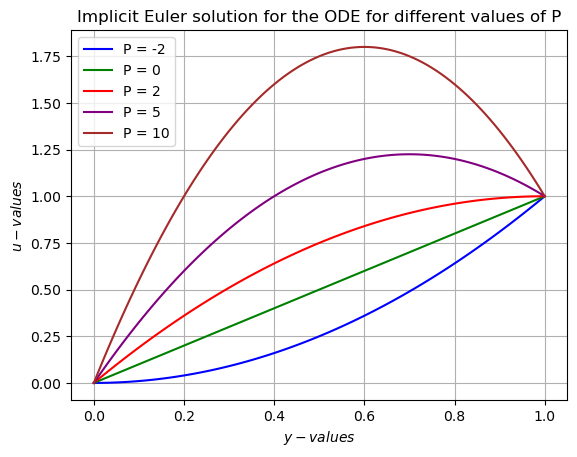

In [20]:
for i in range(len(P)):
    plt.plot(y_ivp, u_implicit[i], c=color[i], label=f"P = {P[i]}", linewidth=1.5)
plt.xlabel("$y-values$")
plt.ylabel("$u-values$")
plt.title("Implicit Euler solution for the ODE for different values of P")
plt.grid()
plt.legend()
plt.show()

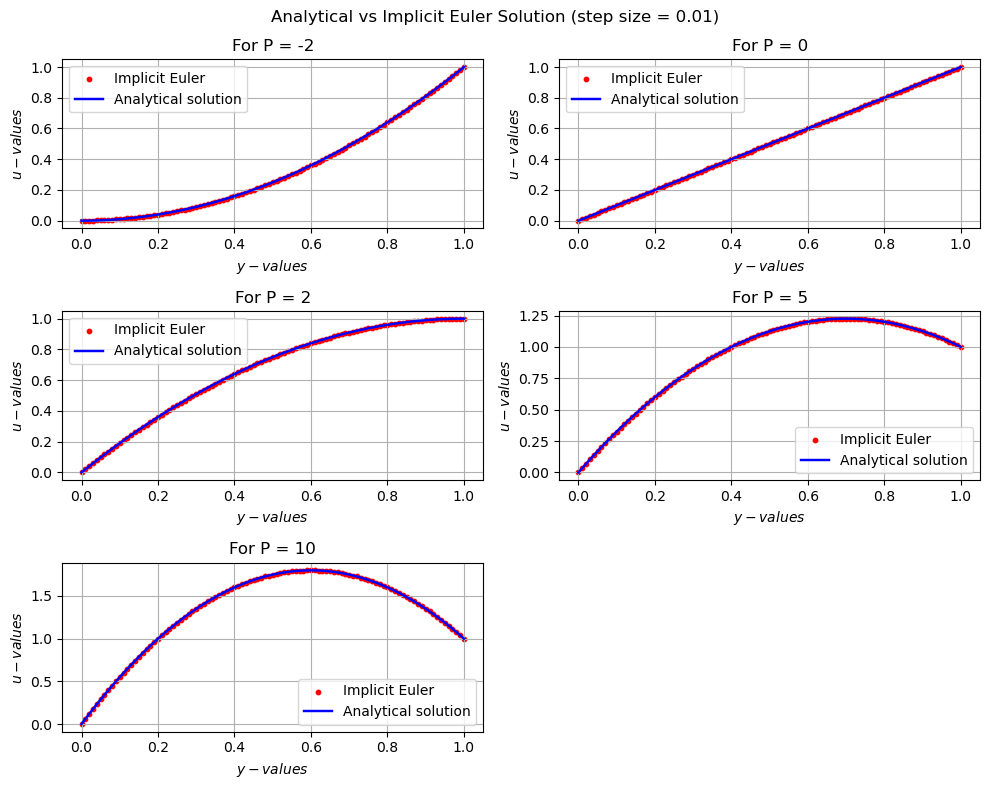

In [21]:
plt.figure(figsize=(10,8))

for i in range(len(P)):
    plt.subplot(3,2,i+1)
    plt.scatter(y_ivp, u_implicit[i], c="red", s=10, label = "Implicit Euler")
    plt.plot(y, analytical_u[i], c="blue", label="Analytical solution", linewidth=1.75)
    plt.xlabel("$y-values$")
    plt.ylabel("$u-values$")
    plt.title(f"For P = {P[i]}")
    plt.grid()
    plt.legend()

plt.suptitle(f"Analytical vs Implicit Euler Solution (step size = {h})")
plt.tight_layout()
plt.show()